# Logisitic Regression Model - Group 3

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [ ]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
#loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0, header = None)

loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)
#loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0, header = None)

### Explore Data

In [ ]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [ ]:
loan_data_inputs_train.shape

(373028, 324)

In [ ]:
loan_data_targets_train.shape

(373028, 1)

In [ ]:
loan_data_inputs_test.shape

(93257, 324)

In [ ]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

In [ ]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
]]



In [ ]:
# Here we select a limited set of input variables in a new dataframe.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
]]



In [ ]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3']


In [ ]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories.
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
427211,True,False,False,False,False,False,False,True,0,False,...,0,0,0,0,1,0,1,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,0,0,0,0,0,0,1,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,1,0,0,0,0,0,0,1,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,0,0,0,1,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories.
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
427211,True,False,False,False,False,False,False,True,0,False,...,0,0,0,0,1,0,1,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,0,0,0,0,0,0,1,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,1,0,0,0,0,0,0,1,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,0,0,0,1,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
inputs_train.shape

(373028, 98)

In [ ]:
loan_data_targets_train.shape

(373028, 1)

In [ ]:
inputs_train_with_ref_cat.shape

(373028, 119)

# Logistic Regression

# Model 1

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
lr = logreg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f"Training Accuracy: {lr.score(inputs_train, loan_data_targets_train)}")
print(f"Test Accuracy: {lr.score(inputs_test, loan_data_targets_test)}")

Training Accuracy: 0.8906811284943758
Test Accuracy: 0.8907427860643169


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(loan_data_targets_test, lr.predict(inputs_test))

array([[    5, 10185],
       [    4, 83063]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f"Accuracy: {accuracy_score(loan_data_targets_test, lr.predict(inputs_test))}")
print(f"Precision: {precision_score(loan_data_targets_test, lr.predict(inputs_test))}")
print(f"Recall: {recall_score(loan_data_targets_test, lr.predict(inputs_test))}")

Accuracy: 0.8907427860643169
Precision: 0.8907751372683597
Recall: 0.999951846100136


In [ ]:
lr.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[ 1.14705029,  0.90553964,  0.70482232,  0.50920514,  0.32464971,
         0.13340705,  0.09134703,  0.10419415,  0.03280059,  0.05500601,
         0.05464595,  0.06054803,  0.07392347,  0.1326558 ,  0.09533405,
         0.18084244,  0.23402407,  0.21762321,  0.2592581 ,  0.31317553,
         0.51566212,  0.07645804, -0.00977882,  0.30932469,  0.20519542,
         0.21908684,  0.27670602,  0.05568408,  0.0835702 ,  0.10214957,
         0.12908644,  0.09398501,  0.06081998,  0.12393798,  1.01059799,
         0.83105368,  0.74906725,  0.56013073,  0.39429457,  0.14902486,
        -0.05399574,  0.84703116,  0.52189497,  0.28311207,  0.10004002,
         0.03702021,  0.0384579 ,  0.09024807,  0.12204775,  0.12512412,
         0.06179098,  0.03544668,  0.68229227,  0.53973976,  0.33237357,
         0.01345392, -0.07493718, -0.10341125, -0.12694632, -0.13560685,
        -0.0958763 , -0.18925264,  0.24904721,  0.27041516, -0.00693995,
         0.04648628,  0.26360283,  0.03861258,  0.0

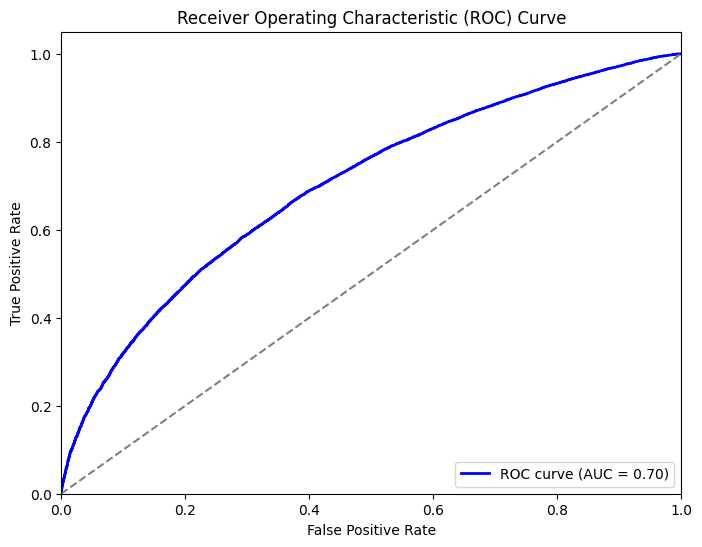

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#Predict probabilities for the test data
probs = lr.predict_proba(inputs_test)
preds = probs[:,1]

#Compute the false positive rate (FPR), true positive rate (TPR), thresholds
fpr, tpr, thresholds = roc_curve(loan_data_targets_test, preds)

#Compute AUC
roc_auc = auc(fpr, tpr)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##LIME

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=296f0bcc397fbc149c1f6f0c454eff5bb84e7bbf9a69daeaa0611fc1e8da1d1e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(inputs_train.values, mode="classification", feature_names=inputs_train.columns)

#Select an observation for explanation
observation_index = 0

#Explaination of the prediction for the observation
explanation = explainer.explain_instance(inputs_test.values[observation_index], lr.predict_proba, num_features=10)

#Display
explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# P-Values

In [ ]:
import statsmodels.api as sm

In [ ]:
#Convert True/False to binary values (1/0)
inputs_train = inputs_train.applymap(lambda x: 1 if x is True else (0 if x is False else x))
inputs_test = inputs_test.applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [ ]:
#Ensure all columns are numeric
inputs_train = inputs_train.apply(pd.to_numeric)
inputs_test = inputs_test.apply(pd.to_numeric)

In [ ]:
#Add a constant term to inputs_train data
inputs_train_with_const = sm.add_constant(inputs_train)

#Fit logistic regression model
logit_model = sm.Logit(loan_data_targets_train, inputs_train_with_const)
logit_result = logit_model.fit()

print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.320725
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               good_bad   No. Observations:               373028
Model:                          Logit   Df Residuals:                   372929
Method:                           MLE   Df Model:                           98
Date:                Thu, 06 Jun 2024   Pseudo R-squ.:                 0.07059
Time:                        14:40:51   Log-Likelihood:            -1.1964e+05
converged:                       True   LL-Null:                   -1.2873e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.3759      0.476 

In [ ]:
#Get p-values
p_values = logit_result.pvalues
print("Variable   P-Value")
for i in range(1, len(inputs_train_with_const.columns)):
    print(f"{inputs_train_with_const.columns[i]:<10} {p_values[i]:.4f}")

Variable   P-Value
grade:A    0.0000
grade:B    0.0000
grade:C    0.0000
grade:D    0.0000
grade:E    0.0000
grade:F    0.0038
home_ownership:OWN 0.0000
home_ownership:MORTGAGE 0.0000
addr_state:NM_VA 0.2376
addr_state:NY 0.0141
addr_state:OK_TN_MO_LA_MD_NC 0.0105
addr_state:CA 0.0022
addr_state:UT_KY_AZ_NJ 0.0015
addr_state:AR_MI_PA_OH_MN 0.0000
addr_state:RI_MA_DE_SD_IN 0.0007
addr_state:GA_WA_OR 0.0000
addr_state:WI_MT 0.0000
addr_state:TX 0.0000
addr_state:IL_CT 0.0000
addr_state:KS_SC_CO_VT_AK_MS 0.0000
addr_state:WV_NH_WY_DC_ME_ID 0.0000
verification_status:Not Verified 0.0000
verification_status:Source Verified 0.4691
purpose:credit_card 0.0000
purpose:debt_consolidation 0.0000
purpose:oth__med__vacation 0.0000
purpose:major_purch__car__home_impr 0.0000
initial_list_status:w 0.0000
term:36    0.0000
emp_length:1 0.0001
emp_length:2-4 0.0000
emp_length:5-6 0.0000
emp_length:7-9 0.0036
emp_length:10 0.0000
mths_since_issue_d:<38 0.0000
mths_since_issue_d:38-39 0.0000
mths_since_is

In [ ]:
#Print variables with p-value < 0.05
print("\nVariables with p-value < 0.05:")
for variable, p_value in p_values.items():
    if p_value < 0.05:
        print(f"{variable}: {p_value:.4f}")


Variables with p-value < 0.05:
const: 0.0000
grade:A: 0.0000
grade:B: 0.0000
grade:C: 0.0000
grade:D: 0.0000
grade:E: 0.0000
grade:F: 0.0038
home_ownership:OWN: 0.0000
home_ownership:MORTGAGE: 0.0000
addr_state:NY: 0.0141
addr_state:OK_TN_MO_LA_MD_NC: 0.0105
addr_state:CA: 0.0022
addr_state:UT_KY_AZ_NJ: 0.0015
addr_state:AR_MI_PA_OH_MN: 0.0000
addr_state:RI_MA_DE_SD_IN: 0.0007
addr_state:GA_WA_OR: 0.0000
addr_state:WI_MT: 0.0000
addr_state:TX: 0.0000
addr_state:IL_CT: 0.0000
addr_state:KS_SC_CO_VT_AK_MS: 0.0000
addr_state:WV_NH_WY_DC_ME_ID: 0.0000
verification_status:Not Verified: 0.0000
purpose:credit_card: 0.0000
purpose:debt_consolidation: 0.0000
purpose:oth__med__vacation: 0.0000
purpose:major_purch__car__home_impr: 0.0000
initial_list_status:w: 0.0000
term:36: 0.0000
emp_length:1: 0.0001
emp_length:2-4: 0.0000
emp_length:5-6: 0.0000
emp_length:7-9: 0.0036
emp_length:10: 0.0000
mths_since_issue_d:<38: 0.0000
mths_since_issue_d:38-39: 0.0000
mths_since_issue_d:40-41: 0.0000
mths_si

# VIF

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(inputs_train)
model = sm.OLS(loan_data_targets_train, X)
result = model.fit()

#Calculate VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                          Features           VIF
0                            const  14411.449332
1                          grade:A     38.048827
2                          grade:B     45.653579
3                          grade:C     39.802252
4                          grade:D     26.100392
..                             ...           ...
94                     dti:22.4-35     26.218094
95  mths_since_last_delinq:Missing     28.647168
96     mths_since_last_delinq:4-30     17.020270
97    mths_since_last_delinq:31-56     15.078185
98     mths_since_last_delinq:>=57      9.905750

[99 rows x 2 columns]


In [ ]:
#Lists based on VIF ranges
low_multicollinearity = []
moderate_multicollinearity = []
high_multicollinearity = []

for index, row in vif.iterrows():
    feature = row['Features']
    vif_value = row['VIF']
    if feature != 'const':
        if vif_value < 5:
            low_multicollinearity.append((feature, vif_value))
        elif 5 <= vif_value < 10:
            moderate_multicollinearity.append((feature, vif_value))
        else:
            high_multicollinearity.append((feature, vif_value))

#Print variables
print("Variables with low multicollinearity (VIF < 5):")
for feature, vif_value in low_multicollinearity:
    print(f"{feature}: {vif_value}")

print("\nVariables with moderate multicollinearity (5 ≤ VIF < 10):")
for feature, vif_value in moderate_multicollinearity:
    print(f"{feature}: {vif_value}")

print("\nVariables with high multicollinearity (VIF ≥ 10):")
for feature, vif_value in high_multicollinearity:
    print(f"{feature}: {vif_value}")


Variables with low multicollinearity (VIF < 5):
grade:F: 4.842628585069996
home_ownership:OWN: 1.158824236619464
home_ownership:MORTGAGE: 1.4061314153885902
addr_state:NM_VA: 1.3174465701068083
addr_state:NY: 1.7367491997917404
addr_state:OK_TN_MO_LA_MD_NC: 1.8154225348017556
addr_state:CA: 2.1976593056273512
addr_state:UT_KY_AZ_NJ: 1.6554581180558927
addr_state:AR_MI_PA_OH_MN: 1.9329195419724317
addr_state:RI_MA_DE_SD_IN: 1.4085628795456409
addr_state:GA_WA_OR: 1.5679921331389288
addr_state:WI_MT: 1.1429020503232796
addr_state:TX: 1.6566273789971182
addr_state:IL_CT: 1.4765135210779137
addr_state:KS_SC_CO_VT_AK_MS: 1.4250258467616388
addr_state:WV_NH_WY_DC_ME_ID: 1.1404911701192972
verification_status:Not Verified: 1.5520618548336906
verification_status:Source Verified: 1.402263849977842
purpose:oth__med__vacation: 2.838380917583432
purpose:major_purch__car__home_impr: 3.4928535677656245
initial_list_status:w: 1.2136319324626
term:36: 1.524917098893276
emp_length:1: 1.452013090652332


In [ ]:
print("Variables with low multicollinearity (VIF < 5):")
for feature, vif_value in low_multicollinearity:
    print(f"{feature}")

print("\nVariables with moderate multicollinearity (5 ≤ VIF < 10):")
for feature, vif_value in moderate_multicollinearity:
    print(f"{feature}")

Variables with low multicollinearity (VIF < 5):
grade:F
home_ownership:OWN
home_ownership:MORTGAGE
addr_state:NM_VA
addr_state:NY
addr_state:OK_TN_MO_LA_MD_NC
addr_state:CA
addr_state:UT_KY_AZ_NJ
addr_state:AR_MI_PA_OH_MN
addr_state:RI_MA_DE_SD_IN
addr_state:GA_WA_OR
addr_state:WI_MT
addr_state:TX
addr_state:IL_CT
addr_state:KS_SC_CO_VT_AK_MS
addr_state:WV_NH_WY_DC_ME_ID
verification_status:Not Verified
verification_status:Source Verified
purpose:oth__med__vacation
purpose:major_purch__car__home_impr
initial_list_status:w
term:36
emp_length:1
emp_length:2-4
emp_length:5-6
emp_length:7-9
emp_length:10
mths_since_issue_d:38-39
mths_since_issue_d:40-41
mths_since_issue_d:49-52
mths_since_issue_d:65-84
mths_since_earliest_cr_line:141-164
mths_since_earliest_cr_line:165-247
mths_since_earliest_cr_line:248-270
mths_since_earliest_cr_line:271-352
mths_since_earliest_cr_line:>352
pub_rec:3-4
pub_rec:>=5
total_acc:28-51
total_acc:>=52
acc_now_delinq:>=1
total_rev_hi_lim:5K-10K
total_rev_hi_lim:

#Leverage only p-values <0.05

### Select new features

In [ ]:
#List of significant variables (p-value < 0.05)
significant_vars = [
    'const', 'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
    'home_ownership:OWN', 'home_ownership:MORTGAGE', 'addr_state:NY', 'addr_state:OK_TN_MO_LA_MD_NC',
    'addr_state:CA', 'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN', 'addr_state:RI_MA_DE_SD_IN',
    'addr_state:GA_WA_OR', 'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT', 'addr_state:KS_SC_CO_VT_AK_MS',
    'addr_state:WV_NH_WY_DC_ME_ID', 'verification_status:Not Verified', 'purpose:credit_card', 'purpose:debt_consolidation',
    'purpose:oth__med__vacation', 'purpose:major_purch__car__home_impr', 'initial_list_status:w', 'term:36', 'emp_length:1',
    'emp_length:2-4', 'emp_length:5-6', 'emp_length:7-9', 'emp_length:10', 'mths_since_issue_d:<38', 'mths_since_issue_d:38-39',
    'mths_since_issue_d:40-41', 'mths_since_issue_d:42-48', 'mths_since_issue_d:49-52', 'mths_since_issue_d:53-64',
    'int_rate:<9.548', 'int_rate:9.548-12.025', 'int_rate:12.025-15.74', 'int_rate:15.74-20.281', 'mths_since_earliest_cr_line:248-270',
    'mths_since_earliest_cr_line:271-352', 'mths_since_earliest_cr_line:>352', 'inq_last_6mths:0', 'inq_last_6mths:1-2', 'inq_last_6mths:3-6',
    'open_acc:1-3', 'open_acc:4-12', 'open_acc:13-17', 'open_acc:18-22', 'open_acc:23-25', 'open_acc:26-30', 'pub_rec:3-4',
    'acc_now_delinq:>=1', 'total_rev_hi_lim:>95K', 'annual_inc:40K-50K', 'annual_inc:50K-60K', 'annual_inc:60K-70K', 'annual_inc:70K-80K',
    'annual_inc:80K-90K', 'annual_inc:90K-100K', 'annual_inc:100K-120K', 'annual_inc:120K-140K', 'annual_inc:>140K', 'dti:<=1.4', 'dti:1.4-3.5',
    'dti:3.5-7.7', 'dti:7.7-10.5', 'dti:10.5-16.1', 'dti:16.1-20.3', 'dti:20.3-21.7', 'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:4-30', 'mths_since_last_delinq:31-56', 'mths_since_last_delinq:>=57'
]

In [ ]:
#Drop the 'const' from the inputs
significant_vars.remove('const')

#Prepare training and testing datasets with significant variables
inputs_train_significant = loan_data_inputs_train[significant_vars]
inputs_test_significant = loan_data_inputs_test[significant_vars]



### Logisitic Regression

In [ ]:
#Logistic regression model
logreg_significant = LogisticRegression()
lr_significant = logreg_significant.fit(inputs_train_significant, loan_data_targets_train)

print(f"Training Accuracy: {lr_significant.score(inputs_train_significant, loan_data_targets_train)}")
print(f"Test Accuracy: {lr_significant.score(inputs_test_significant, loan_data_targets_test)}")



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.8906838092582863
Test Accuracy: 0.890721339953033


In [ ]:
#Confusion matrix
conf_matrix = confusion_matrix(loan_data_targets_test, lr_significant.predict(inputs_test_significant))
print(f"Confusion Matrix:\n{conf_matrix}")



Confusion Matrix:
[[    5 10185]
 [    6 83061]]


In [ ]:
#Accuracy, Precision, and Recall
accuracy = accuracy_score(loan_data_targets_test, lr_significant.predict(inputs_test_significant))
precision = precision_score(loan_data_targets_test, lr_significant.predict(inputs_test_significant))
recall = recall_score(loan_data_targets_test, lr_significant.predict(inputs_test_significant))
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



Accuracy: 0.890721339953033
Precision: 0.8907727945434657
Recall: 0.9999277691502041


In [ ]:
#ROC Curve and AUC
probs = lr_significant.predict_proba(inputs_test_significant)
preds = probs[:, 1]
fpr, tpr, thresholds = roc_curve(loan_data_targets_test, preds)
roc_auc = auc(fpr, tpr)



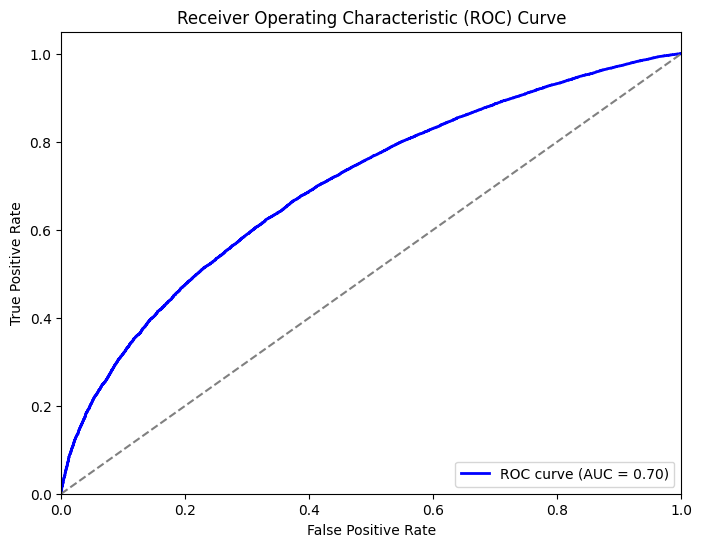

In [ ]:
#Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
inputs_train.shape

(373028, 98)

In [ ]:
loan_data_targets_train.shape

(373028, 1)

In [ ]:
inputs_train_with_ref_cat.shape

(373028, 119)

# Drop Variables with VIF >10

In [ ]:
#Drop variables with high multicollinearity (VIF >= 10)
high_vif_features = [feature for feature, vif_value in high_multicollinearity]

#Drop high VIF features from inputs_train and inputs_test
inputs_train_low_vif = inputs_train.drop(high_vif_features, axis=1)
inputs_test_low_vif = inputs_test.drop(high_vif_features, axis=1)

#Fit model with the reduced features
logreg_low_vif = LogisticRegression()
lr_low_vif = logreg_low_vif.fit(inputs_train_low_vif, loan_data_targets_train)

#Evaluate
print(f"Training Accuracy (after dropping high VIF features): {lr_low_vif.score(inputs_train_low_vif, loan_data_targets_train)}")
print(f"Test Accuracy (after dropping high VIF features): {lr_low_vif.score(inputs_test_low_vif, loan_data_targets_test)}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy (after dropping high VIF features): 0.8905926632853298
Test Accuracy (after dropping high VIF features): 0.890560494118404


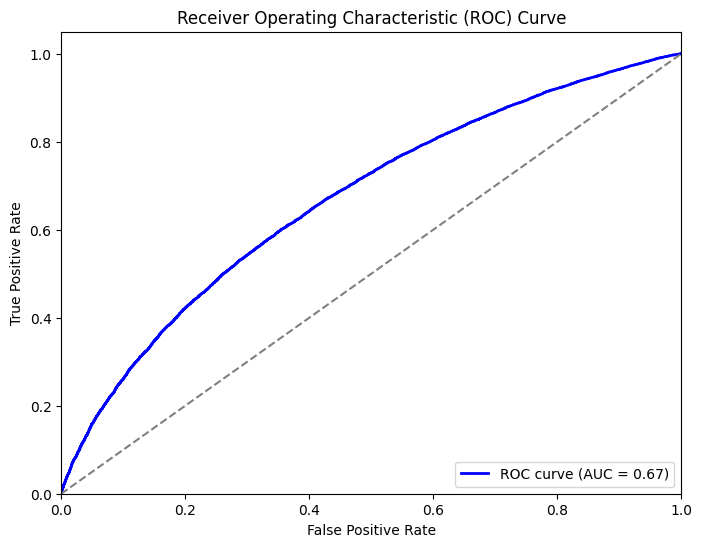

In [ ]:
#predict probabilities for the test data
probs = lr_low_vif.predict_proba(inputs_test_low_vif)
preds = probs[:,1]

#Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(loan_data_targets_test, preds)

#Compute the AUC
roc_auc = auc(fpr, tpr)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Drop variables with p-values <0.05 and VIF <10

In [ ]:
list1 = [
    "grade:A", "grade:B", "grade:C", "grade:D", "grade:E", "grade:F",
    "home_ownership:OWN", "home_ownership:MORTGAGE",
    "addr_state:NY", "addr_state:OK_TN_MO_LA_MD_NC", "addr_state:CA",
    "addr_state:UT_KY_AZ_NJ", "addr_state:AR_MI_PA_OH_MN", "addr_state:RI_MA_DE_SD_IN",
    "addr_state:GA_WA_OR", "addr_state:WI_MT", "addr_state:TX", "addr_state:IL_CT",
    "addr_state:KS_SC_CO_VT_AK_MS", "addr_state:WV_NH_WY_DC_ME_ID",
    "verification_status:Not Verified",
    "purpose:credit_card", "purpose:debt_consolidation", "purpose:oth__med__vacation",
    "purpose:major_purch__car__home_impr",
    "initial_list_status:w", "term:36",
    "emp_length:1", "emp_length:2-4", "emp_length:5-6", "emp_length:7-9", "emp_length:10",
    "mths_since_issue_d:<38", "mths_since_issue_d:38-39", "mths_since_issue_d:40-41",
    "mths_since_issue_d:42-48", "mths_since_issue_d:49-52", "mths_since_issue_d:53-64",
    "int_rate:<9.548", "int_rate:9.548-12.025", "int_rate:12.025-15.74", "int_rate:15.74-20.281",
    "mths_since_earliest_cr_line:248-270", "mths_since_earliest_cr_line:271-352",
    "mths_since_earliest_cr_line:>352",
    "inq_last_6mths:0", "inq_last_6mths:1-2", "inq_last_6mths:3-6",
    "open_acc:1-3", "open_acc:4-12", "open_acc:13-17", "open_acc:18-22", "open_acc:23-25", "open_acc:26-30",
    "pub_rec:3-4",
    "acc_now_delinq:>=1",
    "total_rev_hi_lim:>95K",
    "annual_inc:40K-50K", "annual_inc:50K-60K", "annual_inc:60K-70K", "annual_inc:70K-80K",
    "annual_inc:80K-90K", "annual_inc:90K-100K", "annual_inc:100K-120K", "annual_inc:120K-140K",
    "annual_inc:>140K",
    "dti:<=1.4", "dti:1.4-3.5", "dti:3.5-7.7", "dti:7.7-10.5", "dti:10.5-16.1", "dti:16.1-20.3", "dti:20.3-21.7",
    "mths_since_last_delinq:Missing", "mths_since_last_delinq:4-30", "mths_since_last_delinq:31-56",
    "mths_since_last_delinq:>=57"
]

list2 = [
    "grade:F",
    "home_ownership:OWN", "home_ownership:MORTGAGE",
    "addr_state:NM_VA", "addr_state:NY", "addr_state:OK_TN_MO_LA_MD_NC", "addr_state:CA",
    "addr_state:UT_KY_AZ_NJ", "addr_state:AR_MI_PA_OH_MN", "addr_state:RI_MA_DE_SD_IN", "addr_state:GA_WA_OR",
    "addr_state:WI_MT", "addr_state:TX", "addr_state:IL_CT", "addr_state:KS_SC_CO_VT_AK_MS",
    "addr_state:WV_NH_WY_DC_ME_ID",
    "verification_status:Not Verified", "verification_status:Source Verified",
    "purpose:oth__med__vacation", "purpose:major_purch__car__home_impr",
    "initial_list_status:w", "term:36",
    "emp_length:1", "emp_length:2-4", "emp_length:5-6", "emp_length:7-9", "emp_length:10",
    "mths_since_issue_d:38-39", "mths_since_issue_d:40-41", "mths_since_issue_d:49-52", "mths_since_issue_d:65-84",
    "mths_since_earliest_cr_line:141-164", "mths_since_earliest_cr_line:165-247",
    "mths_since_earliest_cr_line:248-270", "mths_since_earliest_cr_line:271-352",
    "mths_since_earliest_cr_line:>352",
    "pub_rec:3-4", "pub_rec:>=5",
    "total_acc:28-51", "total_acc:>=52",
    "acc_now_delinq:>=1",
    "total_rev_hi_lim:5K-10K", "total_rev_hi_lim:10K-20K", "total_rev_hi_lim:20K-30K", "total_rev_hi_lim:30K-40K",
    "total_rev_hi_lim:40K-55K", "total_rev_hi_lim:55K-95K", "total_rev_hi_lim:>95K",
    "annual_inc:20K-30K", "annual_inc:120K-140K",
    "dti:<=1.4", "dti:1.4-3.5", "dti:21.7-22.4",
    "purpose:credit_card", "purpose:debt_consolidation",
    "mths_since_issue_d:<38", "mths_since_issue_d:42-48", "mths_since_issue_d:53-64",
    "int_rate:15.74-20.281",
    "annual_inc:30K-40K", "annual_inc:40K-50K", "annual_inc:50K-60K", "annual_inc:60K-70K", "annual_inc:70K-80K",
    "annual_inc:80K-90K", "annual_inc:90K-100K", "annual_inc:100K-120K", "annual_inc:>140K",
    "dti:20.3-21.7",
    "mths_since_last_delinq:>=57"
]

common_variables = set(list1) & set(list2)
print(common_variables)


{'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN', 'home_ownership:MORTGAGE', 'addr_state:GA_WA_OR', 'initial_list_status:w', 'dti:20.3-21.7', 'purpose:credit_card', 'mths_since_issue_d:49-52', 'mths_since_issue_d:40-41', 'addr_state:NY', 'purpose:oth__med__vacation', 'int_rate:15.74-20.281', 'mths_since_earliest_cr_line:271-352', 'total_rev_hi_lim:>95K', 'mths_since_issue_d:42-48', 'dti:<=1.4', 'annual_inc:50K-60K', 'annual_inc:>140K', 'mths_since_issue_d:38-39', 'grade:F', 'addr_state:RI_MA_DE_SD_IN', 'purpose:major_purch__car__home_impr', 'term:36', 'pub_rec:3-4', 'addr_state:WI_MT', 'mths_since_earliest_cr_line:248-270', 'addr_state:OK_TN_MO_LA_MD_NC', 'emp_length:10', 'annual_inc:90K-100K', 'annual_inc:60K-70K', 'emp_length:5-6', 'annual_inc:80K-90K', 'annual_inc:120K-140K', 'mths_since_earliest_cr_line:>352', 'emp_length:2-4', 'emp_length:1', 'addr_state:IL_CT', 'emp_length:7-9', 'annual_inc:100K-120K', 'home_ownership:OWN', 'addr_state:WV_NH_WY_DC_ME_ID', 'purpose:debt_cons

In [ ]:
#List of new significant variables (p-value < 0.05) and VIF < 10
new_significant_vars = [
    'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN', 'home_ownership:MORTGAGE', 'addr_state:GA_WA_OR', 'initial_list_status:w', 'dti:20.3-21.7', 'purpose:credit_card', 'mths_since_issue_d:49-52', 'mths_since_issue_d:40-41', 'addr_state:NY', 'purpose:oth__med__vacation', 'int_rate:15.74-20.281', 'mths_since_earliest_cr_line:271-352', 'total_rev_hi_lim:>95K', 'mths_since_issue_d:42-48', 'dti:<=1.4', 'annual_inc:50K-60K', 'annual_inc:>140K', 'mths_since_issue_d:38-39', 'grade:F', 'addr_state:RI_MA_DE_SD_IN', 'purpose:major_purch__car__home_impr', 'term:36', 'pub_rec:3-4', 'addr_state:WI_MT', 'mths_since_earliest_cr_line:248-270', 'addr_state:OK_TN_MO_LA_MD_NC', 'emp_length:10', 'annual_inc:90K-100K', 'annual_inc:60K-70K', 'emp_length:5-6', 'annual_inc:80K-90K', 'annual_inc:120K-140K', 'mths_since_earliest_cr_line:>352', 'emp_length:2-4', 'emp_length:1', 'addr_state:IL_CT', 'emp_length:7-9', 'annual_inc:100K-120K', 'home_ownership:OWN', 'addr_state:WV_NH_WY_DC_ME_ID', 'purpose:debt_consolidation', 'mths_since_issue_d:53-64', 'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:CA', 'verification_status:Not Verified', 'acc_now_delinq:>=1', 'annual_inc:40K-50K', 'addr_state:TX', 'mths_since_issue_d:<38', 'dti:1.4-3.5', 'annual_inc:70K-80K', 'mths_since_last_delinq:>=57'
]

In [ ]:
#Training and testing datasets with significant variables
inputs_train_significant_new = loan_data_inputs_train[new_significant_vars]
inputs_test_significant_new = loan_data_inputs_test[new_significant_vars]

In [ ]:
#New logistic regression model
logreg_significant_new = LogisticRegression()
lr_significant = logreg_significant_new.fit(inputs_train_significant_new, loan_data_targets_train)

#Evaluate
print(f"Training Accuracy: {lr_significant.score(inputs_train_significant_new, loan_data_targets_train)}")
print(f"Test Accuracy: {lr_significant.score(inputs_test_significant_new, loan_data_targets_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.8906007055770613
Test Accuracy: 0.8906141093966137


In [ ]:
#Accuracy, Precision, and Recall
accuracy = accuracy_score(loan_data_targets_test, lr_significant.predict(inputs_test_significant_new))
precision = precision_score(loan_data_targets_test, lr_significant.predict(inputs_test_significant_new))
recall = recall_score(loan_data_targets_test, lr_significant.predict(inputs_test_significant_new))
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.8906141093966137
Precision: 0.8907862276091387
Recall: 0.9997712689756462


In [ ]:
#ROC Curve and AUC
probs = lr_significant.predict_proba(inputs_test_significant_new)
preds = probs[:, 1]
fpr, tpr, thresholds = roc_curve(loan_data_targets_test, preds)
roc_auc = auc(fpr, tpr)

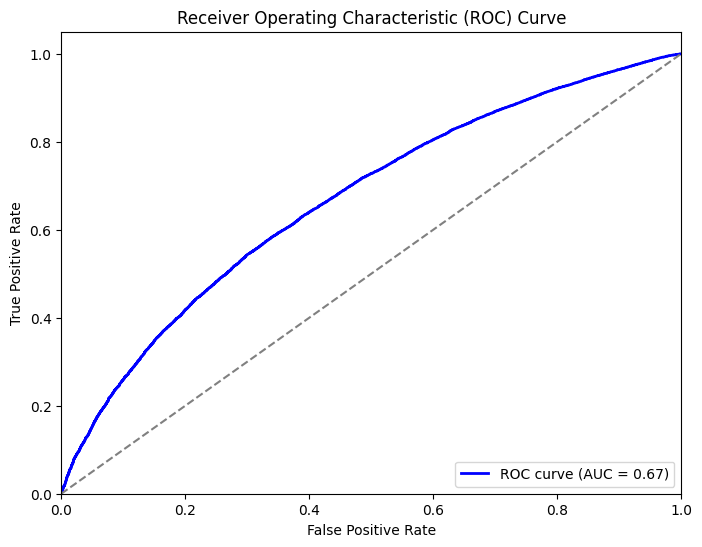

In [ ]:
#Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Variations of Variables Experimentation Section

In [ ]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
]]

In [ ]:
# Here we select a limited set of input variables in a new dataframe.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
]]


In [ ]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3']

In [ ]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
427211,True,False,False,False,False,False,False,True,0,False,...,0,0,0,0,1,0,1,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,0,0,0,0,0,0,1,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,1,0,0,0,0,0,0,1,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,0,0,0,1,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
427211,True,False,False,False,False,False,False,True,0,False,...,0,0,0,0,1,0,1,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,0,0,0,0,0,0,1,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,1,0,0,0,0,0,0,1,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,0,0,0,1,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
lr = logreg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f"Training Accuracy: {lr.score(inputs_train, loan_data_targets_train)}")
print(f"Test Accuracy: {lr.score(inputs_test, loan_data_targets_test)}")

Training Accuracy: 0.8906864900221967
Test Accuracy: 0.8907320630086749


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f"Accuracy: {accuracy_score(loan_data_targets_test, lr.predict(inputs_test))}")
print(f"Precision: {precision_score(loan_data_targets_test, lr.predict(inputs_test))}")
print(f"Recall: {recall_score(loan_data_targets_test, lr.predict(inputs_test))}")

Accuracy: 0.8907320630086749
Precision: 0.8907739659184746
Recall: 0.9999398076251701


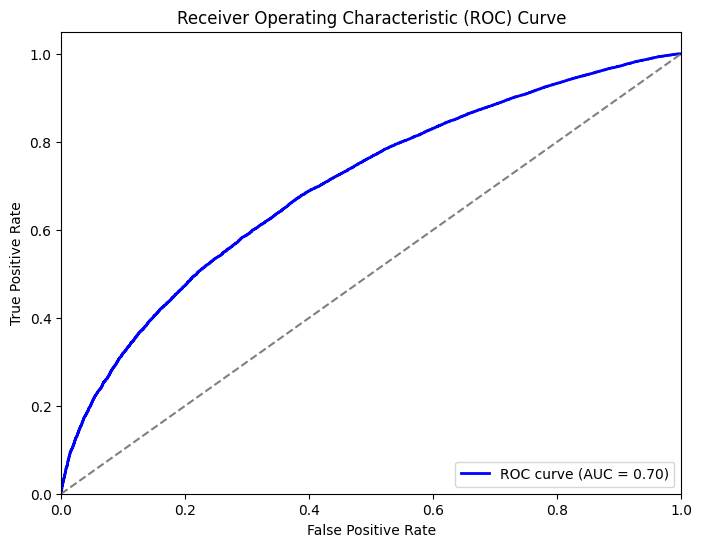

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#Predict probabilities for the test data
probs = lr.predict_proba(inputs_test)
preds = probs[:,1]

#Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(loan_data_targets_test, preds)

#Compute AUC
roc_auc = auc(fpr, tpr)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

References:

** Leveraged code provided in Canvas ISM 8000 module,
Logistic Reression - PD Model.ipynb **

“Credit Risk Modeling Logistic Regression: How to Use Logistic Regression for Credit Risk Analysis.” FasterCapital, fastercapital.com/content/Credit-risk-modeling-logistic-regression--How-to-Use-Logistic-Regression-for-Credit-Risk-Analysis.html. Accessed 4 June 2024.

Nield, T. (n.d.). Chapter 6. Logistic Regression and Classification. In Essential Math for Data Science (pp. 19–39). essay, O’Reilly Media, Inc. Retrieved June 6, 2024.

Chinnam, Ratna. (2024). [PowerPoint slides for IE 7860 Intelligent Analytics, Model 	Assessment]. Wayne State University.
https://canvas.wayne.edu/courses/197047/pages/model-assessment?module_item_id=4758715

Chinnam, Ratna. (2024). [PowerPoint slides for IE 7860 Intelligent Analytics, Interpretable Machine Learning (Explainable AI)]. Wayne State University. https://canvas.wayne.edu/courses/197047/pages/interpretable-machine-learning-explainable-ai?module_item_id=4758721

OpenAI. (2024). ChatGPT (June version) [Large language model]. https://chat.openai.com/chat  
- Fact-checking domain knowledge
- Code Review